# **MACHINE LEARNING**

##Tugas Praktikum Modul 07 - Clustering


---


##Masfudin Dwi Cahyo
##2141720010
##TI-3D


---



# **TUGAS**

Buatlah sebuah model K-Means dengan ketentuan,
1. Gunakan data 'Mall_Customers.csv'
2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)
3. Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik.
4. Buatlah  implementasi model SOM untuk segmentasi citra lain



---



# **1. Gunakan data 'Mall_Customers.csv'**

In [70]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [5]:
# Load Data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
data = pd.read_csv('/content/drive/MyDrive/Machine Learning/Week 07/Tugas Praktikum/Mall_Customers.csv')

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [72]:
# cek data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [73]:
# cek data
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [74]:
data.shape

(200, 5)



---

# **2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)**

**Melihat fitur yang memungkinkan dengan visualisasi**

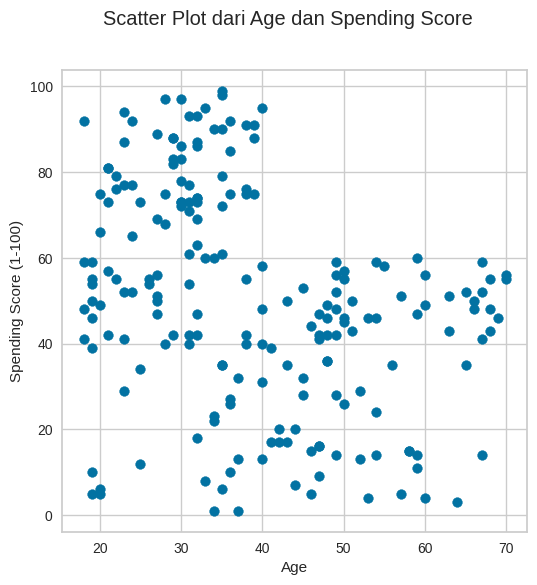

In [75]:
# Distribusi Age dan Spending-Score
age = data['Age'].tolist()  # mengubah kolom 'Age' menjadi list
spending_score = data['Spending Score (1-100)'].tolist()  # mengubah kolom 'Spending Score (1-100)' menjadi list
fig = plt.figure(figsize=(6,6))
plt.scatter(age, spending_score)
plt.suptitle("Scatter Plot dari Age dan Spending Score")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

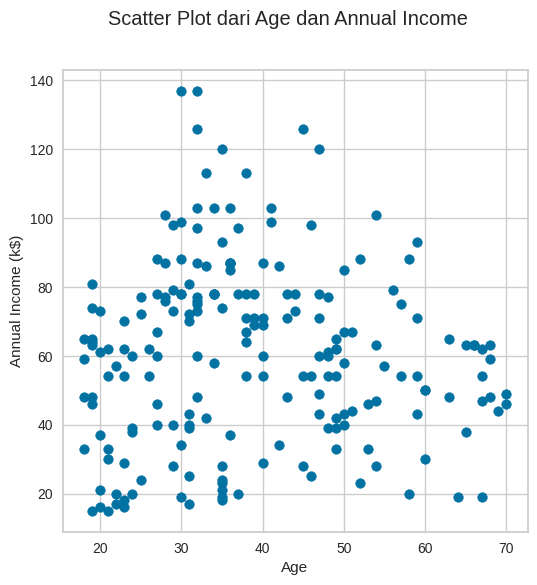

In [76]:
# Distribusi Age dan Annual Income
age = data['Age'].tolist()  # mengubah kolom 'Age' menjadi list
annual_income = data['Annual Income (k$)'].tolist()  # mengubah kolom 'Annual Income (k$)' menjadi list
fig = plt.figure(figsize=(6,6))
plt.scatter(age, annual_income)
plt.suptitle("Scatter Plot dari Age dan Annual Income")
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.show()

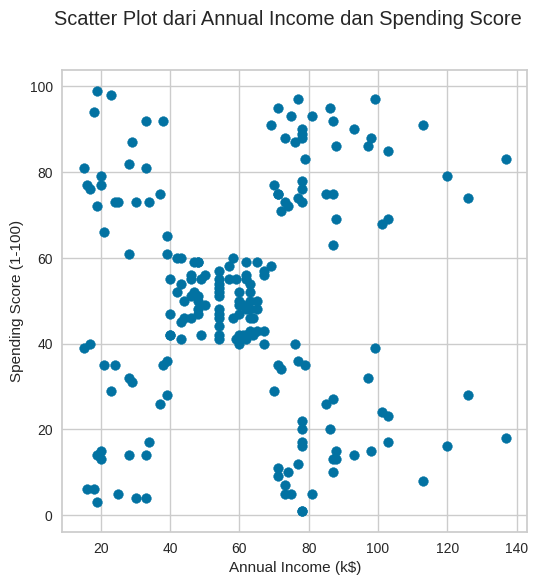

In [77]:
# Distribusi Annual Income dan Spending Score
annual_income = data['Annual Income (k$)'].tolist()  # mengubah kolom 'Annual Income (k$)' menjadi list
spending_score = data['Spending Score (1-100)'].tolist()  # mengubah kolom 'Spending Score (1-100)' menjadi list
fig = plt.figure(figsize=(6,6))
plt.scatter(annual_income, spending_score)
plt.suptitle("Scatter Plot dari Annual Income dan Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

**Seleksi Fitur dengan Metode PCA**

Principal Component Analysis (PCA) adalah metode yang digunakan untuk mengurangi dimensi data dengan mengubah data asli menjadi kombinasi linear dari fitur asli. PCA mencari arah di mana data memiliki variansi terbesar dan mengubah data ke dalam ruang dimensi yang lebih rendah. PCA dapat digunakan untuk memilih subset fitur yang paling signifikan dalam data.

In [78]:
# Fitur berjumlah 3
# Metode PCA
from sklearn.decomposition import PCA

# mendefinisikan fitur dan target
feature = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
target = ['CustomerID']

# split fitur dan target
X = data[feature]
y = data[target]

print(X.head(), '\n')
print(y.head())

   Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40 

   CustomerID
0           1
1           2
2           3
3           4
4           5


In [79]:
# menjalankan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# rasio variansi
print('Rasio Variansi:', pca.explained_variance_ratio_)

Rasio Variansi: [0.45125272 0.44098465]


**pca.explained_variance_ratio_** adalah kode yang digunakan untuk mencetak rasio variansi yang dijelaskan oleh setiap komponen utama dalam data. Rasio variansi ini menunjukkan seberapa banyak informasi yang dijelaskan oleh setiap komponen utama dalam data. Semakin tinggi rasio variansi, semakin banyak informasi yang dijelaskan oleh komponen utama tersebut. Dalam seleksi fitur, rasio variansi dapat digunakan untuk menentukan jumlah komponen utama yang akan digunakan dalam clustering. Jumlah komponen utama yang dipilih harus cukup untuk menjelaskan sebagian besar variansi dalam data, tetapi tidak terlalu banyak sehingga dapat mengurangi kinerja clustering.

In [80]:
# menjalankan K-Means clustering pada reduced data
kmeans = KMeans(n_clusters=5, n_init=8, random_state=0).fit(X_pca)

# Print cluster centers
print('Cluster centers:', kmeans.cluster_centers_)

Cluster centers: [[-10.22346234  42.33151065]
 [ -4.41034605  -3.10054946]
 [ 41.55109062   1.86988377]
 [-44.38700009 -10.04934895]
 [  4.98429835 -46.67348852]]


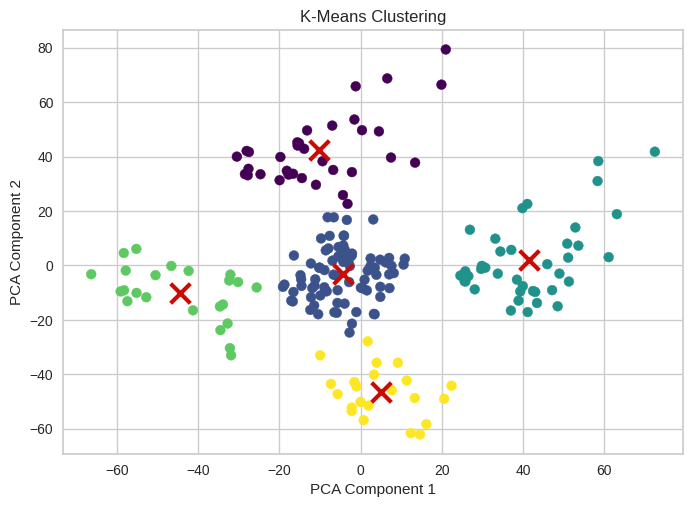

In [81]:
y_kmeans = kmeans.predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=200, linewidths=3, color='r')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering')
plt.show()



---

# **3. Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik.**

**Metode Elbow**

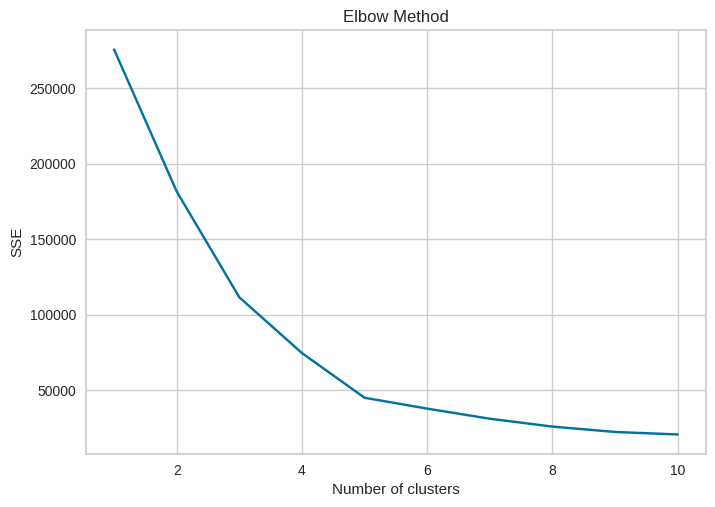

k=1; SSE=275534.30374608736
k=2; SSE=181555.07675938227
k=3; SSE=111540.67345911881
k=4; SSE=74664.88785512332
k=5; SSE=45092.072284924776
k=6; SSE=37908.62603124931
k=7; SSE=31220.904312320687
k=8; SSE=26022.29636558263
k=9; SSE=22469.098378120914
k=10; SSE=20809.660874388428


In [82]:
# menghitung K-Means clustering untuk setiap nilai k yang berbeda

# list nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,11)   # (1,11) karena 11 akan dikurangi 1

for k in K:
    kmeans = KMeans(n_clusters=k, n_init=8, random_state=0).fit(X_pca)
    sse.append(kmeans.inertia_)

# Plot SSE vs. k
plt.plot(K, sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

### **Tambahan**

# **Menggunakan library YellowBrick**

**Metode Elbow**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

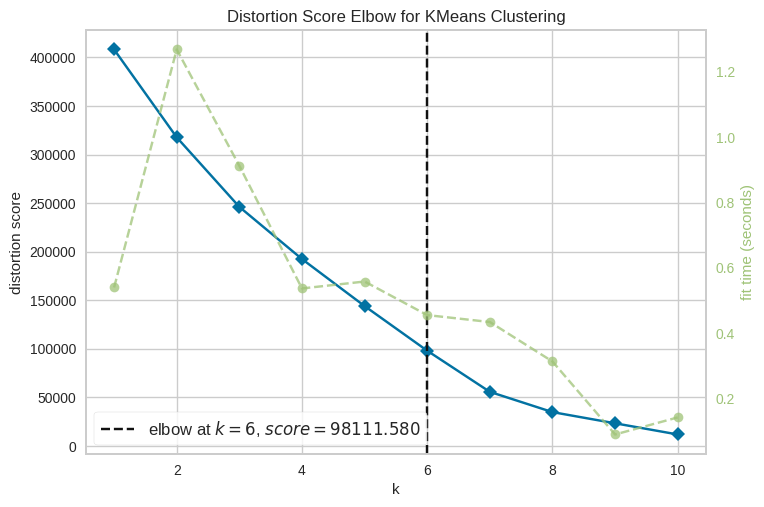

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [85]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 10 random clusters
X_pca, y = make_blobs(n_samples=1000, n_features=12, centers=10, random_state=42)  # make_blobs tidak bisa ditambahkan n_init

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11))

visualizer.fit(X_pca)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

--

**Metode Silhouette**

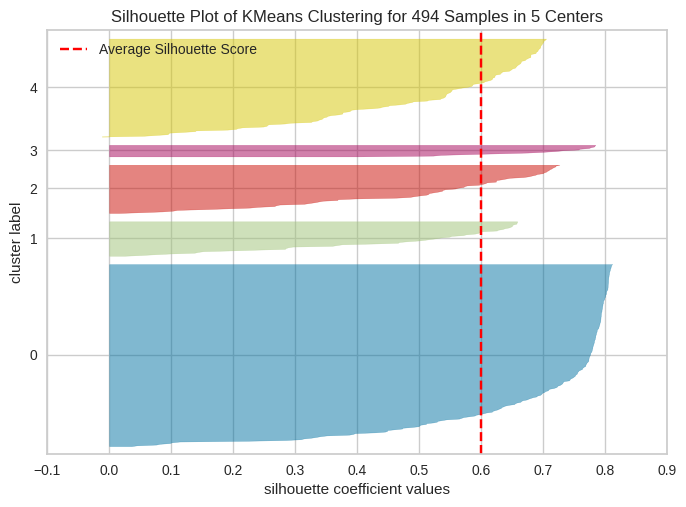

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 494 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [88]:
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(5, random_state=42, n_init=8)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

# fit data
visualizer.fit(X_pca)

# Finalize and render the figure
visualizer.show()